In [1]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers.pooling import MaxPooling1D, GlobalMaxPooling1D
from keras.layers.convolutional import Conv1D, UpSampling1D
from keras_tqdm import TQDMNotebookCallback
 
from settings import *
import eb_models
from preprocessing import load_npz, make_dataset, normalize

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [2]:
batch_size = 128
num_classes = 1
epochs = 100
cut_len = 1024

In [3]:
data0_list = []
data1_list = []
for sector in [1, 2, 3, 5]:
    npzpath0 = os.path.join(datdir, "%s_0.npz" % sector)
    npzpath1 = os.path.join(datdir, "%s_1.npz" % sector)
    data1 = load_npz(npzpath1)
    data0 = load_npz(npzpath0)[:data1.shape[0]]
    data0 = make_dataset(data0, cut_len)
    data1 = make_dataset(data1, cut_len)
    data0_list.append(data0)
    data1_list.append(data1)
data0 = np.vstack(tuple(data0_list))
data1 = np.vstack(tuple(data1_list))
label0 = np.zeros(data0.shape[0])
label1 = np.ones(data1.shape[0])
data = np.vstack((data0, data1))
label = np.hstack((label0, label1))
data = normalize(data)

In [4]:
#分割
x_train, x_test, y_train, y_test = train_test_split(data, label, test_size=0.2)

In [5]:
#keras用にデータをreshape
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))
y_test = np.reshape(y_test, (y_test.shape[0], 1))
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((18512, 1024, 1), (4628, 1024, 1), (18512, 1), (4628, 1))

In [6]:
model = eb_models.Model1().model

In [7]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=0, validation_split=0.2, callbacks=[TQDMNotebookCallback()])

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


KeyboardInterrupt: 

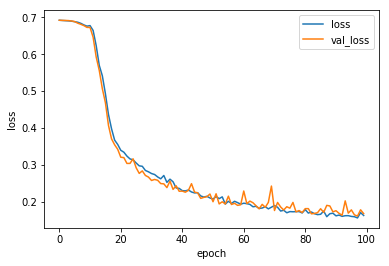

In [10]:
plt.plot(range(epochs), history.history["loss"], label="loss")
plt.plot(range(epochs), history.history["val_loss"], label="val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend() 
plt.show()

In [11]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.15037078877255747
Test accuracy: 0.9438202246675845
